# Text-to-Speech FastSpeech2

FastSpeech2, Text to Melspectrogram.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-fastspeech2](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-fastspeech2).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### FastSpeech2 description

1. Malaya-speech FastSpeech2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.
3. Cannot generate more than melspectrogram longer than 2000 timestamp, it will throw an error. Make sure the texts are not too long.

### List available FastSpeech2

In [2]:
malaya_speech.tts.available_fastspeech2()

INFO:root:`husein`, `haqkiem` and `female-singlish` combined loss from training set


,Size (MB),Quantized Size (MB),Combined loss
male,125.0,31.7,1.8000
female,125.0,31.7,1.7440
husein,125.0,31.7,0.5832
haqkiem,125.0,31.7,0.5663
female-singlish,125.0,31.7,0.5112


`husein` voice contributed by [Husein-Zolkepli](https://www.linkedin.com/in/husein-zolkepli/), recorded using low-end microphone in a small room with no reverberation absorber.

`haqkiem` voice contributed by [Haqkiem Hamdan](https://www.linkedin.com/in/haqkiem-daim/), recorded using high-end microphone in an audio studio.

`female-singlish` voice contributed by [SG National Speech Corpus](https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus), recorded using high-end microphone in an audio studio.

### Load FastSpeech2 model

Fastspeech2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works,

```bash
pip install malaya -U
```

```python
def fastspeech2(
    model: str = 'male',
    quantized: bool = False,
    pad_to: int = 8,
    true_case: str = None,
    **kwargs
):
    """
    Load Fastspeech2 TTS model.

    Parameters
    ----------
    model : str, optional (default='male')
        Model architecture supported. Allowed values:

        * ``'female'`` - Fastspeech2 trained on female voice.
        * ``'male'`` - Fastspeech2 trained on male voice.
        * ``'husein'`` - Fastspeech2 trained on Husein voice, https://www.linkedin.com/in/husein-zolkepli/
        * ``'haqkiem'`` - Fastspeech2 trained on Haqkiem voice, https://www.linkedin.com/in/haqkiem-daim/
        * ``'female-singlish'`` - Fastspeech2 trained on female Singlish voice, https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus
        
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    pad_to : int, optional (default=8)
        size of pad character with 0. Increase can stable up prediction on short sentence, we trained on 8.

    true_case: str, optional (default=None)
        Load True Case model from https://malaya.readthedocs.io/en/latest/load-true-case.html,
        to fix case sensitive and punctuation errors. Allowed values:

        * ``'small'`` - Small size True Case model.
        * ``'base'`` - Base size True Case model.
        * ``None`` - no True Case model.

    Returns
    -------
    result : malaya_speech.model.tf.Fastspeech class
    """
```

In [3]:
male = malaya_speech.tts.fastspeech2(model = 'male')

INFO:root:running tts/fastspeech2-male using device /device:CPU:0


In [4]:
# https://www.sinarharian.com.my/article/115216/BERITA/Politik/Syed-Saddiq-pertahan-Dr-Mahathir
string1 = 'Syed Saddiq berkata, mereka seharusnya mengingati bahawa semasa menjadi Perdana Menteri Pakatan Harapan'

### Predict

```python
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    f0_ratio: float = 1.0,
    energy_ratio: float = 1.0,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    f0_ratio: float, optional (default=1.0)
        Increase this variable will increase frequency, low frequency will generate more deeper voice.
    energy_ratio: float, optional (default=1.0)
        Increase this variable will increase loudness.

    Returns
    -------
    result: Dict[string, decoder-output, universal-output, mel-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [5]:
r_male = male.predict(string1)

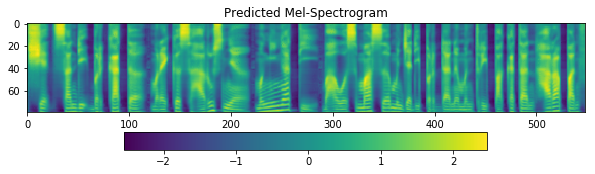

In [6]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_male['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Load Vocoder model

There are 2 ways to synthesize melspectrogram output from TTS models,

1. If you are going to use individual speaker vocoder, make sure the speakers are the same If use female tacotron2, need to use female MelGAN also. Use `mel-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-vocoder.html
2. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

We prefer individual speaker vocoder, size only 17MB and faster than universal vocoder.

In [7]:
vocoder_male = malaya_speech.vocoder.melgan(model = 'male')

INFO:root:running vocoder-melgan/male using device /device:CPU:0


In [8]:
universal_melgan = malaya_speech.vocoder.melgan(model = 'universal-1024')

INFO:root:running vocoder-melgan/universal-1024 using device /device:CPU:0


In [9]:
y_ = vocoder_male(r_male['mel-output'])
ipd.Audio(y_, rate = 22050)

In [10]:
y_ = universal_melgan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)

### Playing around with speed, f0 and energy ratio

In [11]:
r_male = male.predict(string1, speed_ratio = 1.5)

In [12]:
y_ = vocoder_male(r_male['mel-output'])
ipd.Audio(y_, rate = 22050)

In [13]:
r_male = male.predict(string1, f0_ratio = 3.0)

In [14]:
y_ = vocoder_male(r_male['mel-output'])
ipd.Audio(y_, rate = 22050)

In [15]:
r_male = male.predict(string1, energy_ratio = 1.5)

In [16]:
y_ = universal_melgan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)

### Combined everything using Pipeline

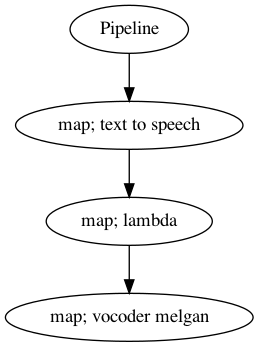

In [17]:
p = Pipeline()
pipeline = (
    p.map(male)
    .map(lambda x: x['mel-output'])
    .map(vocoder_male)
)
p.visualize()

In [18]:
r = p('husein wangi tetapi ketiak masam nasib baik kacak')

In [19]:
ipd.Audio(r['vocoder-melgan'], rate = 22050)

### Compare speed with Tacotron2

In [20]:
# https://www.hmetro.com.my/mutakhir/2020/12/657604/6-cadangan-tangani-kelemahan-kawal-selia-halal

text = 'Kuasa pensijilan halal, dan penguatkuasaan halal terletak di bawah bidang kuasa agensi yang berbeza.'

In [21]:
male_tacotron2 = malaya_speech.tts.tacotron2(model = 'male')

INFO:root:running tts/tacotron2-male using device /device:CPU:0


In [22]:
%%time

r_male_tacotron2 = male_tacotron2.predict(text)

CPU times: user 5.41 s, sys: 2.42 s, total: 7.83 s
Wall time: 7.42 s


In [23]:
y_ = universal_melgan(r_male_tacotron2['universal-output'])
ipd.Audio(y_, rate = 22050)

In [24]:
%%time

r_male = male.predict(text)

CPU times: user 629 ms, sys: 48.9 ms, total: 678 ms
Wall time: 133 ms


In [25]:
y_ = universal_melgan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)